# Linear Regression

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('../data/weight-height.csv')

In [ ]:
df.head()

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [ ]:
def line(x, w=0, b=0):
    return x * w + b

In [ ]:
x = np.linspace(55, 80, 100)

In [ ]:
x

In [ ]:
yhat = line(x, w=0, b=0)

In [ ]:
yhat

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [ ]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [ ]:
X = df[['Height']].values
y_true = df['Weight'].values

In [ ]:
y_true

In [ ]:
y_pred = line(X)

In [ ]:
y_pred

In [ ]:
mean_squared_error(y_true, y_pred.ravel())

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

In [ ]:
y_pred = line(X, w=6, b=-250)
mean_squared_error(y_true, y_pred.ravel())

In [ ]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b');

## Linear Regression with Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(1, input_shape=(1,)))

In [ ]:
model.summary()

In [ ]:
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

In [ ]:
model.fit(X, y_true, epochs=40)

In [ ]:
y_pred = model.predict(X)

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [ ]:
W, B = model.get_weights()

In [ ]:
W

In [ ]:
B

## Evaluating Model Performance

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [ ]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [ ]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

In [ ]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

# Classification

In [384]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [385]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


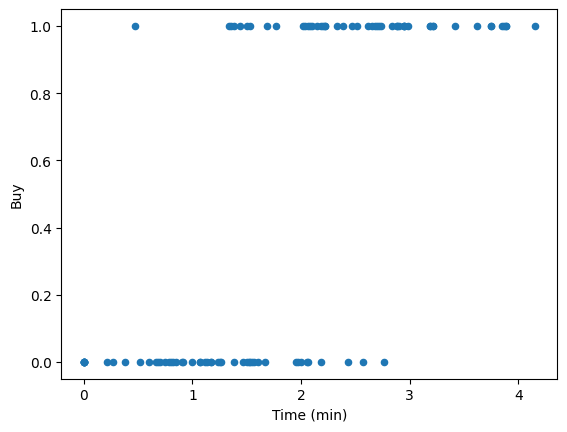

In [386]:
df.plot(kind='scatter', x='Time (min)', y='Buy');

In [387]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [388]:
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [389]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [390]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
4/4 [==============================] - 0s 4ms/step - loss: 0.9566 - accuracy: 0.4800
Epoch 2/25
4/4 [==============================] - 0s 13ms/step - loss: 0.6484 - accuracy: 0.5000
Epoch 3/25
4/4 [==============================] - 0s 13ms/step - loss: 0.6112 - accuracy: 0.5800
Epoch 4/25
4/4 [==============================] - 0s 11ms/step - loss: 0.6131 - accuracy: 0.6000
Epoch 5/25
4/4 [==============================] - 0s 8ms/step - loss: 0.5532 - accuracy: 0.7200
Epoch 6/25
4/4 [==============================] - 0s 3ms/step - loss: 0.5435 - accuracy: 0.7100
Epoch 7/25
4/4 [==============================] - 0s 6ms/step - loss: 0.5333 - accuracy: 0.8400
Epoch 8/25
4/4 [==============================] - 0s 13ms/step - loss: 0.5582 - accuracy: 0.7300
Epoch 9/25
4/4 [==============================] - 0s 8ms/step - loss: 0.4889 - accuracy: 0.8100
Epoch 10/25
4/4 [==============================] - 0s 7ms/step - loss: 0.4899 - accuracy: 0.7800
Epoch 11/25
4/4 [==================

2/2 [==============================] - 0s 2ms/step


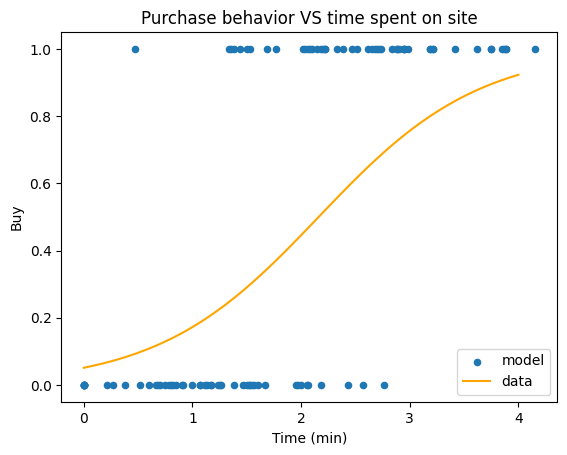

In [123]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [124]:
temp_class = model.predict(temp) > 0.5

2/2 [==============================] - 0s 7ms/step


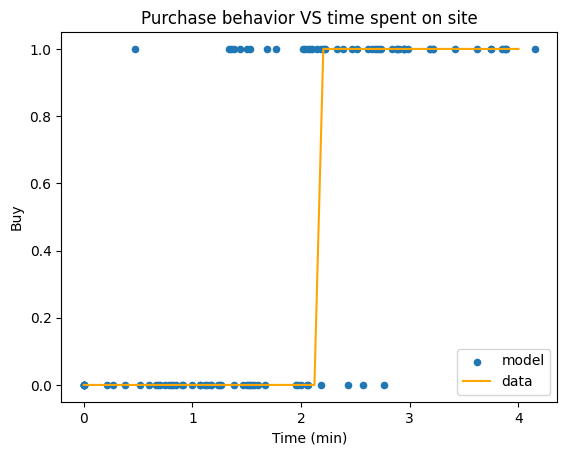

In [125]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [126]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

4/4 [==============================] - 0s 2ms/step


In [127]:
from sklearn.metrics import accuracy_score

In [128]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.810


### Train/Test split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [ ]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

In [ ]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [ ]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

## Cross Validation

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(learning_rate=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
cv = KFold(3, shuffle=True)

In [ ]:
scores = cross_val_score(model, X, y, cv=cv)

In [ ]:
scores

In [ ]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y, y_class_pred)

In [ ]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [ ]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y, y_class_pred))

## Feature Preprocessing

### Categorical Features

In [ ]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

In [ ]:
df['Gender'].unique()

In [ ]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

## Feature Transformations

#### 1) Rescale with fixed factor

In [ ]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [ ]:
df.describe().round(2)

#### MinMax normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

#### 3) Standard normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

In [ ]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature);

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [1020]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [1021]:
df = pd.read_csv('../data/housing-data.csv')
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [1022]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


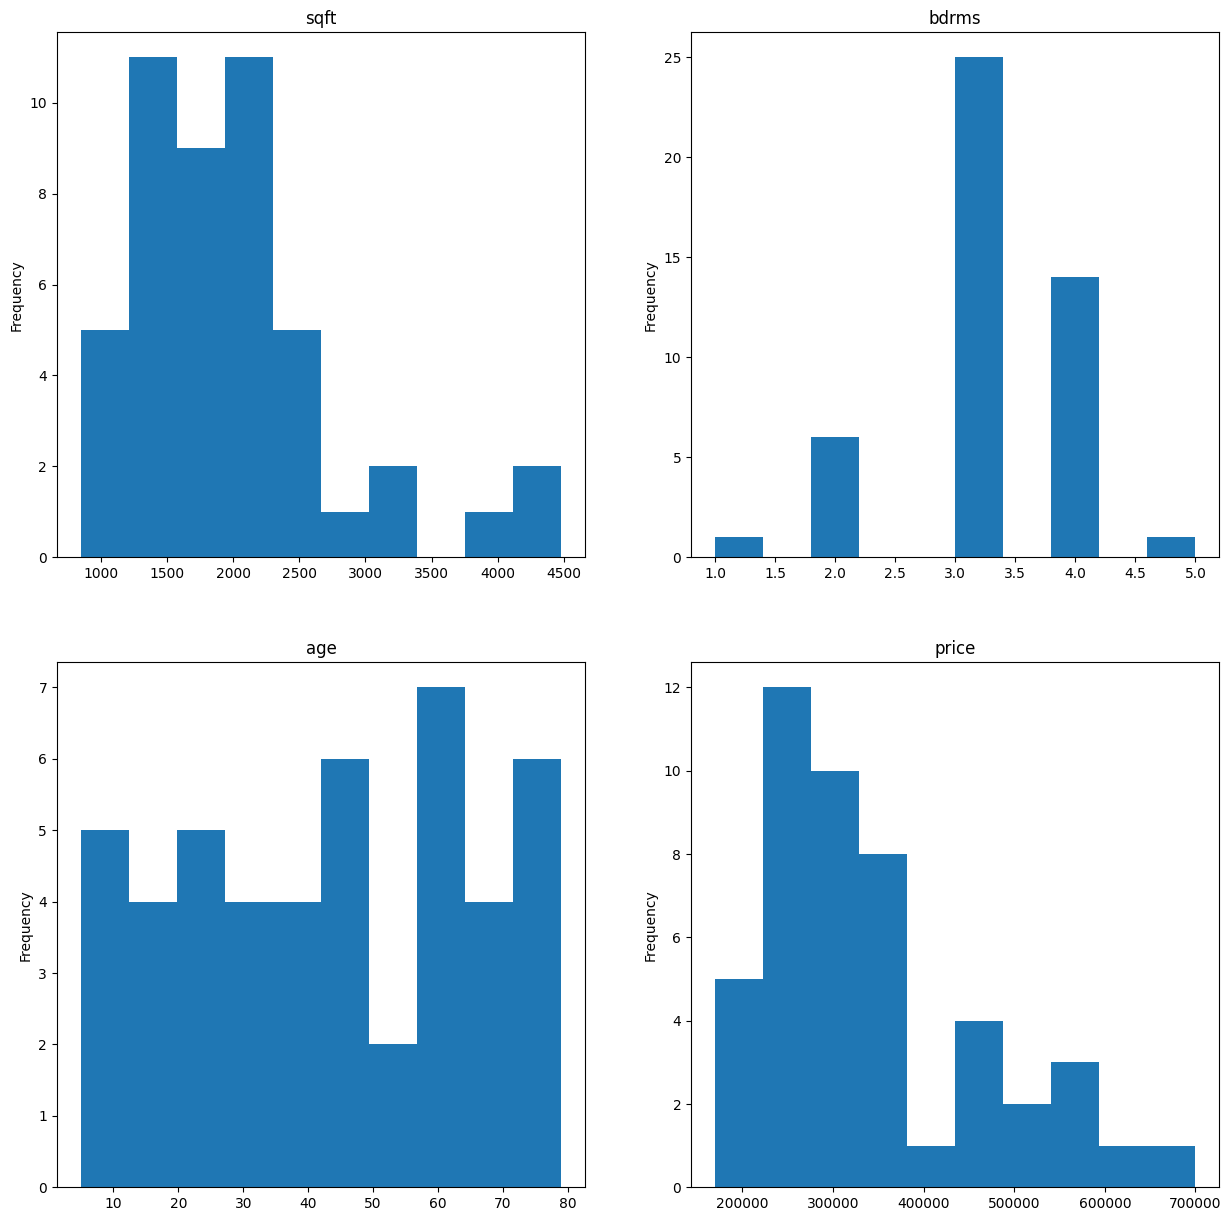

In [1023]:
plt.subplots(ncols = 2, nrows=2,figsize=(15, 15))
count = 0
for feature in df.keys():
    plt.subplot(2,2,count+1)
    count+=1
    df[feature].plot(kind='hist', title=feature)
    #plt.xlabel(feature);

In [1028]:
X = df[['sqft','bdrms','age']].values
y = df[['price']].values

In [1029]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [1030]:
model = Sequential()

In [1031]:
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(learning_rate=0.5), 'mean_squared_error')

In [1032]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [1033]:
from sklearn.model_selection import train_test_split

In [1034]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1035]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
2/2 [==============================] - 0s 4ms/step - loss: 136153808896.0000
Epoch 2/10
2/2 [==============================] - 0s 6ms/step - loss: 134601703424.0000
Epoch 3/10
2/2 [==============================] - 0s 22ms/step - loss: 133001822208.0000
Epoch 4/10
2/2 [==============================] - 0s 19ms/step - loss: 131481600000.0000
Epoch 5/10
2/2 [==============================] - 0s 12ms/step - loss: 129905360896.0000
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 128392232960.0000
Epoch 7/10
2/2 [==============================] - 0s 4ms/step - loss: 126791884800.0000
Epoch 8/10
2/2 [==============================] - 0s 3ms/step - loss: 125224247296.0000
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 123802378240.0000
Epoch 10/10
2/2 [==============================] - 0s 4ms/step - loss: 122297499648.0000


In [1036]:
from sklearn.metrics import r2_score

In [1037]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

1/1 [==============================] - 0s 16ms/step
The R2 score on the Train set is:	-6.759
The R2 score on the Test set is:	-6.373


In [1038]:
df['sqft1000'] = df['sqft']/1000.0
df['age10'] = df['age']/10.0
df['price100k'] = df['price']/1e5

In [1044]:
X = df[['sqft1000','bdrms','age10']].values
y = df[['price100k']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model.fit(X_train, y_train, epochs=10)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

In [ ]:
model.fit(X_train, y_train, epochs=20)

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=3))
model.compile(Adam(learning_rate=0.1), 'mean_squared_error')
model.fit(X_train, y_train, epochs=20)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

In [ ]:
model.fit(X_train, y_train, epochs=40, verbose=0)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. They would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [1101]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [1102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [1103]:
df = pd.read_csv('../data/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [1104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [1105]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [1106]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [1107]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [1108]:
df.left.value_counts() / len(df)

left
0    0.761917
1    0.238083
Name: count, dtype: float64

In [1109]:
df['average_montly_hours_100'] = df['average_montly_hours']/100.0
df['average_montly_hours_100'] = df['average_montly_hours_100'].astype('float64')

In [1110]:
df['sales'].dtype == np.dtype('O')

True

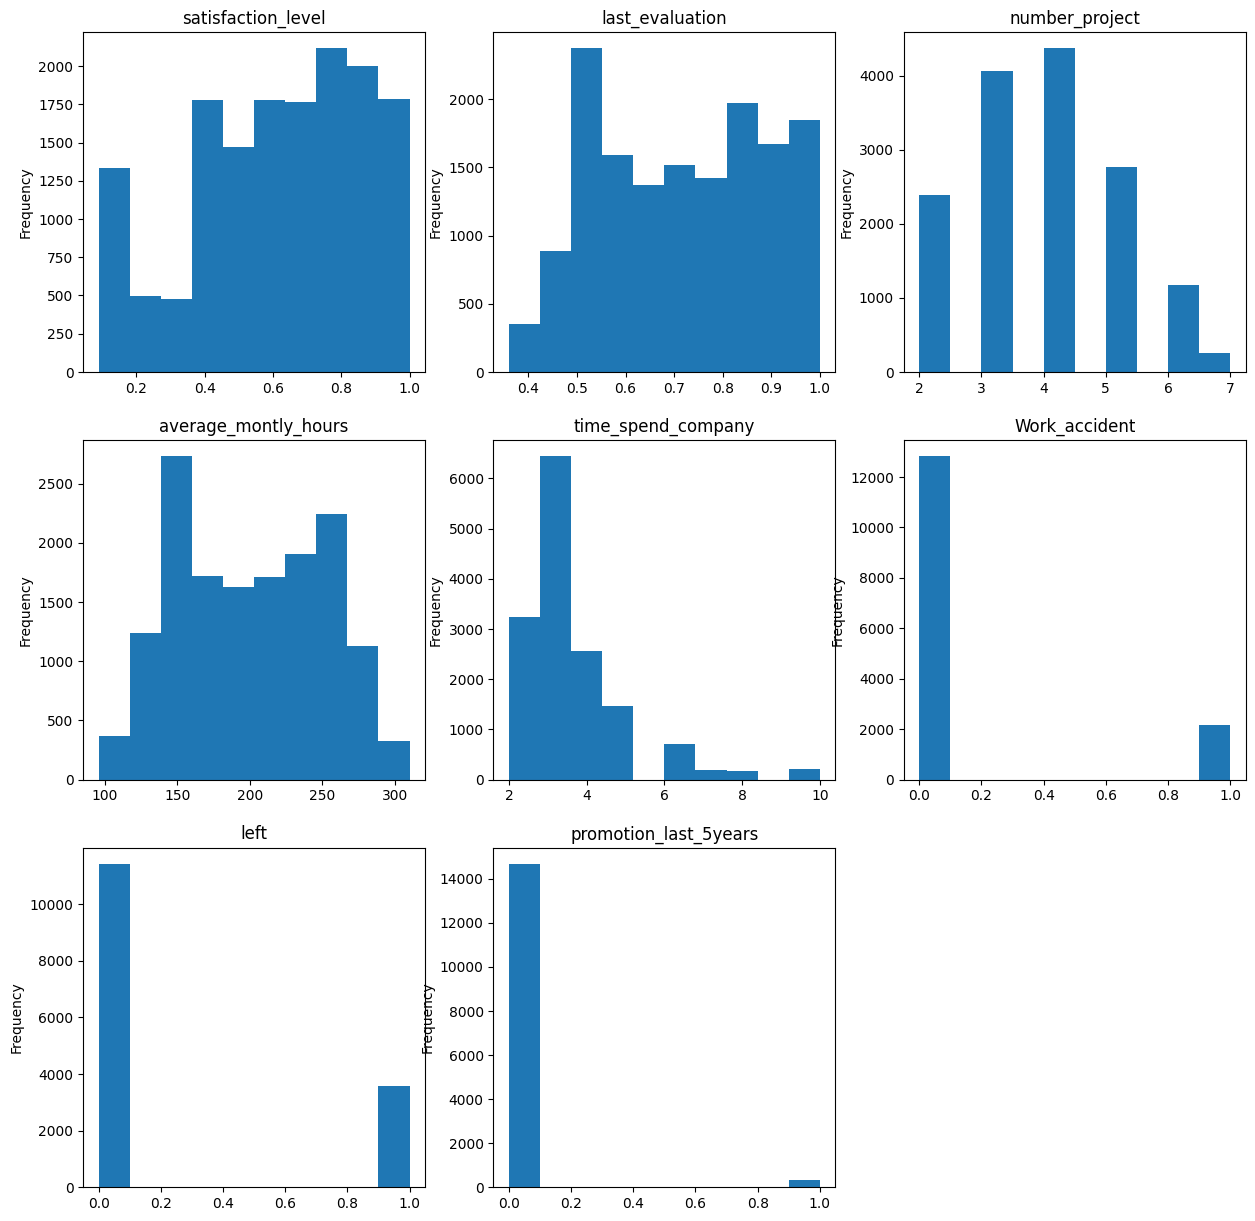

In [1111]:
fig, axs = plt.subplots(3,3, figsize=[15,15], clear=True)
#print (fig,axs)
axs[2][2].remove()

count = 0
for feature in df.keys():
    if df[feature].dtype == np.dtype('O'):
        continue
    if count == 8:
        break
    plt.subplot(3,3,count+1)
    count+=1
    df[feature].plot(kind='hist', title=feature)
    #plt.xlabel(feature);

In [1128]:
df_dummies = pd.get_dummies(df[['sales','salary']])

In [1113]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sales_IT           14999 non-null  bool 
 1   sales_RandD        14999 non-null  bool 
 2   sales_accounting   14999 non-null  bool 
 3   sales_hr           14999 non-null  bool 
 4   sales_management   14999 non-null  bool 
 5   sales_marketing    14999 non-null  bool 
 6   sales_product_mng  14999 non-null  bool 
 7   sales_sales        14999 non-null  bool 
 8   sales_support      14999 non-null  bool 
 9   sales_technical    14999 non-null  bool 
 10  salary_high        14999 non-null  bool 
 11  salary_low         14999 non-null  bool 
 12  salary_medium      14999 non-null  bool 
dtypes: bool(13)
memory usage: 190.5 KB


In [1134]:
bools = df_dummies.select_dtypes(include=['boolean']).columns
df_dummies[bools] = df_dummies[bools].astype(int)
print(df_dummies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sales_IT           14999 non-null  int32
 1   sales_RandD        14999 non-null  int32
 2   sales_accounting   14999 non-null  int32
 3   sales_hr           14999 non-null  int32
 4   sales_management   14999 non-null  int32
 5   sales_marketing    14999 non-null  int32
 6   sales_product_mng  14999 non-null  int32
 7   sales_sales        14999 non-null  int32
 8   sales_support      14999 non-null  int32
 9   sales_technical    14999 non-null  int32
 10  salary_high        14999 non-null  int32
 11  salary_low         14999 non-null  int32
 12  salary_medium      14999 non-null  int32
dtypes: int32(13)
memory usage: 761.8 KB
None


In [1114]:
df.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'average_montly_hours_100'],
      dtype='object')

In [1115]:
df1 = df[['satisfaction_level', 'last_evaluation', 'number_project',
                   'time_spend_company', 'Work_accident',
                   'promotion_last_5years', 'average_montly_hours_100']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   satisfaction_level        14999 non-null  float64
 1   last_evaluation           14999 non-null  float64
 2   number_project            14999 non-null  int64  
 3   time_spend_company        14999 non-null  int64  
 4   Work_accident             14999 non-null  int64  
 5   promotion_last_5years     14999 non-null  int64  
 6   average_montly_hours_100  14999 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 820.4 KB


In [1135]:
dfd1 = pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project',
                   'time_spend_company', 'Work_accident',
                   'promotion_last_5years', 'average_montly_hours_100']],
               df_dummies], axis=1)

#dfd1.to_csv('../data/HR_comma_sep_mine.csv')

#dfd2 = pd.read_csv('../data/HR_comma_sep_mine.csv')

X = dfd1.to_numpy()
print(type(X[0][1]))

X1  = df[['satisfaction_level', 'last_evaluation']].values

<class 'numpy.float64'>


In [1136]:
dfd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   satisfaction_level        14999 non-null  float64
 1   last_evaluation           14999 non-null  float64
 2   number_project            14999 non-null  int64  
 3   time_spend_company        14999 non-null  int64  
 4   Work_accident             14999 non-null  int64  
 5   promotion_last_5years     14999 non-null  int64  
 6   average_montly_hours_100  14999 non-null  float64
 7   sales_IT                  14999 non-null  int32  
 8   sales_RandD               14999 non-null  int32  
 9   sales_accounting          14999 non-null  int32  
 10  sales_hr                  14999 non-null  int32  
 11  sales_management          14999 non-null  int32  
 12  sales_marketing           14999 non-null  int32  
 13  sales_product_mng         14999 non-null  int32  
 14  sales_

In [1137]:
X.shape

(14999, 20)

In [1138]:
y = df['left']

In [1139]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [1019]:
for i in range(len(X)):
    for y in range(len(X[i])):
        if type(X[i][y]) == float:
            X[i][y] = np.float64(X[i][y])
        if type(X[i][y]) == int:
            X[i][y] = np.int64(X[i][y])

print (X.dtype,X.shape, len(X), len(X[0]))
for i in range(len(X[0])):
    print (type(X[0][i]), hasattr(X[0][i], "shape"))

object (14999, 20) 14999 20
<class 'numpy.float64'> True
<class 'numpy.float64'> True
<class 'numpy.int64'> True
<class 'numpy.int64'> True
<class 'numpy.int64'> True
<class 'numpy.int64'> True
<class 'numpy.float64'> True
<class 'bool'> False
<class 'bool'> False
<class 'bool'> False
<class 'bool'> False
<class 'bool'> False
<class 'bool'> False
<class 'bool'> False
<class 'bool'> False
<class 'bool'> False
<class 'bool'> False
<class 'bool'> False
<class 'bool'> False
<class 'bool'> False
()


In [1140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1141]:
model = Sequential()
model.add(Dense(1,input_dim = 20, activation='sigmoid'))
model.compile(Adam(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [1142]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 1)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [1143]:
model.fit(X_train, y_train)

375/375 [==============================] - 2s 3ms/step - loss: 0.5795 - accuracy: 0.7567


In [1144]:
y_test_pred = model.predict(X_test)

94/94 [==============================] - 0s 2ms/step


In [1145]:
from sklearn.metrics import confusion_matrix, classification_report

In [1146]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [1152]:
y_test

6812     0
1749     1
7836     0
7310     0
8842     0
        ..
8785     0
5613     0
12253    1
7637     0
14578    1
Name: left, Length: 3000, dtype: int64

In [1153]:
y_test_pred

array([[0.15854849],
       [0.02196444],
       [0.02373989],
       ...,
       [0.14070748],
       [0.00544124],
       [0.41917685]], dtype=float32)

In [1163]:
y_test_pred_1 = [ 1 if i > 0.5 else 0  for i in y_test_pred ]

In [1164]:
y_test_pred_1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1166]:
pretty_confusion_matrix(y_test, y_test_pred_1, labels=['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,2248,58
Leave,571,123


In [1167]:
print (classification_report(y_test, y_test_pred_1))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2306
           1       0.68      0.18      0.28       694

    accuracy                           0.79      3000
   macro avg       0.74      0.58      0.58      3000
weighted avg       0.77      0.79      0.74      3000



In [1173]:
from keras.wrappers.scikit_learn import KerasClassifier

In [1171]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=10, verbose=0)

C:\Users\simfe\AppData\Local\Temp\ipykernel_80068\3396403795.py:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_logistic_regression_model,


In [1174]:
from sklearn.model_selection import KFold, cross_val_score

In [1175]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7773 ± 0.0203


In [1176]:
scores

array([0.75766665, 0.76566666, 0.80966669, 0.76099998, 0.79259753])